<a href="https://colab.research.google.com/github/Jefferson-Garay/Detecci-n-de-anomal-as-en-contratos-p-blicos-del-Estado-peruano/blob/main/ENTRENAMIENTO_ANOMALIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTACIÓN DE LIBRERIAS

In [ ]:
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install scipy

!pip install missingno
!pip install sentence-transformers


In [ ]:
import pandas as pd
import re
import numpy as np
import pickle
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import re
from nltk.corpus import stopwords
import nltk
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

from warnings import filterwarnings
filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
%matplotlib inline
from scipy import stats
from scipy.stats import zscore
from sklearn.model_selection import (train_test_split,RandomizedSearchCV,StratifiedKFold)
from sklearn.preprocessing import (MinMaxScaler,StandardScaler,QuantileTransformer,PolynomialFeatures,LabelEncoder)
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report,roc_curve)
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# OCR A LOS CONTRATOS (PDF)

## Limpieza del Texto OCR

In [ ]:


# Descargar stopwords si no están
nltk.download('stopwords')

# --- Cargar archivo ---
archivo = "DATA_OCR_YA_FIN.xlsx"
df = pd.read_excel(archivo)

columna_texto = "texto_extraido"

# --- Función para limpiar texto ---
def limpiar(texto):
    if not isinstance(texto, str):
        return ""
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúñü0-9 ]', ' ', texto)
    texto = re.sub(r'\s+', ' ', texto)
    stop_es = set(stopwords.words("spanish"))
    palabras = [p for p in texto.split() if p not in stop_es and len(p) > 2]
    return " ".join(palabras)

# --- Aplicar limpieza ---
df["texto_limpio"] = df[columna_texto].astype(str).apply(limpiar)
print("✔ Limpieza completa")

# --- Guardar en Excel ---
archivo_salida = "DATA_OCR_LIMPIO.xlsx"
df.to_excel(archivo_salida, index=False)
print(f"✔ Archivo limpio guardado: {archivo_salida}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


FileNotFoundError: [Errno 2] No such file or directory: 'DATA_OCR_YA_FIN.xlsx'

##GUARDAR LA DATA LIMPIA QUE SE OBTUVO DEL OCR

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk

# Descargar stopwords si no están
nltk.download('stopwords')

# --- Cargar archivo ---
archivo = "DATA_OCR_YA_FIN.xlsx"
df = pd.read_excel(archivo)

columna_texto = "texto_extraido"

# --- Función para limpiar texto ---
def limpiar(texto):
    if not isinstance(texto, str):
        return ""
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúñü0-9 ]', ' ', texto)
    texto = re.sub(r'\s+', ' ', texto)
    stop_es = set(stopwords.words("spanish"))
    palabras = [p for p in texto.split() if p not in stop_es and len(p) > 2]
    return " ".join(palabras)

# --- Aplicar limpieza ---
df["texto_limpio"] = df[columna_texto].astype(str).apply(limpiar)
print("✔ Limpieza completa")

# --- Guardar en Excel ---
archivo_salida = "DATA_OCR_LIMPIO.xlsx"
df.to_excel(archivo_salida, index=False, engine="openpyxl")
print(f"✔ Archivo limpio guardado: {archivo_salida}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laboratorioesan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✔ Limpieza completa
✔ Archivo limpio guardado: DATA_OCR_LIMPIO.xlsx


In [ ]:
from scipy.sparse import load_npz

# Carga la matriz sparse guardada
matriz_tfidf = load_npz("tfidf_vectors.npz")

print("Shape:", matriz_tfidf.shape)

# Para ver algunos datos (por ejemplo, las primeras 5 filas como array denso):
print(matriz_tfidf[:5].toarray())


Shape: (87147, 3000)
[[0.02852978 0.         0.         ... 0.         0.         0.08270406]
 [0.         0.         0.         ... 0.01766237 0.01854592 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.08575244 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.06083659 ... 0.         0.         0.        ]]


## MODELO PREENTRENADO: Mutilingual-MiniML- L12 -V2
para obtener los vectores de cada contrato de 384 dimensiones

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
from tqdm import tqdm

data = pd.read_excel("/content/drive/MyDrive/MACHINE_LEARNING DATA/laboratorio model/machine/DATA_OCR_LIMPIO.xlsx")

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
from tqdm import tqdm

# cargar modelo en GPU
model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2", device="cuda")

textos = data["texto_limpio"].astype(str).tolist()
#textos = data["texto_limpio"].astype(str).tolist()

batch_size = 128
embeddings = []

for i in tqdm(range(0, len(textos), batch_size)):
    batch = textos[i:i+batch_size]
    emb = model.encode(batch,
                       convert_to_numpy=True,
                       show_progress_bar=False)
    embeddings.append(emb)

embeddings = np.vstack(embeddings)
emb_data_df = pd.DataFrame(embeddings, columns=[f"emb_{i}" for i in range(embeddings.shape[1])])


100%|██████████| 681/681 [04:10<00:00,  2.72it/s]


### guardar la matriz en pickle

In [ ]:
import pickle

with open("embeddings_ocr.pkl", "wb") as f:
    pickle.dump(emb_data_df, f)

### leer la matriz en pickle

In [ ]:
with open("embeddings_ocr.pkl", "rb") as f:
    df_cargado = pickle.load(f)

In [ ]:
df_cargado

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_374,emb_375,emb_376,emb_377,emb_378,emb_379,emb_380,emb_381,emb_382,emb_383
0,-0.165657,0.182390,-0.072138,0.030252,-0.008687,0.013798,0.080615,0.191054,-0.001604,-0.008544,...,-0.046243,-0.145836,0.102068,-0.086647,0.019835,-0.037687,-0.080394,-0.076396,-0.061452,0.114972
1,-0.205236,0.123842,0.018224,-0.151455,-0.064216,0.017622,0.050999,0.125565,0.069924,0.045448,...,-0.042226,0.043219,-0.106451,-0.043536,0.036160,-0.068017,0.022387,-0.119177,-0.071639,0.085779
2,-0.161944,-0.042941,0.179615,-0.174579,0.078968,-0.258677,-0.049395,0.225057,-0.010926,0.323754,...,0.088412,-0.248932,-0.158886,-0.244790,0.167631,0.200533,-0.047621,0.162725,-0.135280,0.162698
3,-0.186308,0.086870,0.094534,-0.167107,0.161733,-0.279032,-0.045676,0.344458,0.140059,0.066460,...,0.015633,-0.179834,-0.245353,-0.204346,0.008962,0.050038,0.052137,-0.057769,0.114266,0.203238
4,0.004516,-0.110372,0.244757,-0.100064,0.089286,-0.301600,-0.160037,0.296214,0.038715,0.162665,...,0.087011,-0.169941,-0.174756,-0.201629,-0.065396,0.176499,0.125701,0.098872,-0.079447,0.161182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87142,-0.228290,0.216879,-0.075858,-0.152917,0.172473,-0.034481,0.039932,0.170126,0.062053,0.224270,...,0.049505,0.052333,0.034268,-0.004394,0.039937,0.182317,-0.186841,0.110929,-0.084297,0.185406
87143,-0.045959,0.094324,0.096681,-0.027250,0.105791,-0.043978,0.010483,-0.013785,-0.189222,0.238146,...,0.020537,-0.042629,0.026685,-0.003999,0.080881,0.044422,-0.081018,0.061287,-0.044055,0.137631
87144,-0.106832,-0.028090,0.074696,-0.074059,-0.001233,-0.085244,-0.006875,0.002950,-0.003722,0.161466,...,0.087354,-0.042877,0.027757,-0.002307,0.169975,0.079496,-0.115064,0.007535,-0.145228,0.098329
87145,0.031148,0.086414,0.155014,0.004747,-0.158674,-0.111942,0.102774,0.041419,-0.143475,0.282174,...,0.117990,0.103845,-0.095725,-0.108247,-0.027701,0.174585,-0.085652,0.064660,0.048274,0.144473


In [ ]:
import pickle

## CLUSTERING A LOS CONTRATOS

### SELECCION DEL MEJOR K

In [ ]:
with open("/content/drive/MyDrive/MACHINE_LEARNING DATA/laboratorio model/machine/embeddings_ocr.pkl", "rb") as f:
    df_cargado = pickle.load(f)

📊 Probando varios K...
✔ Métricas listas


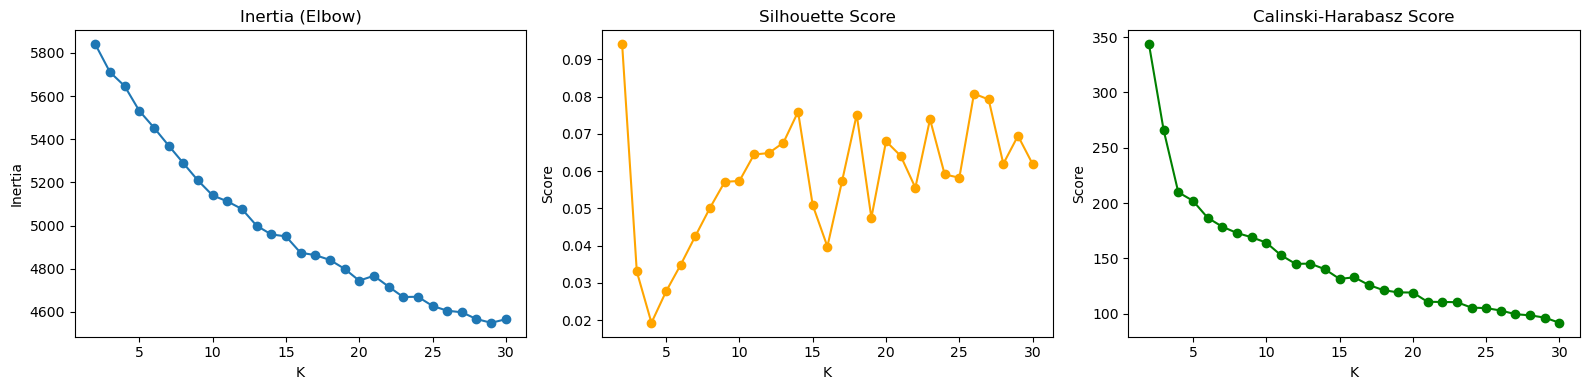

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.sparse import load_npz

X = df_cargado.to_numpy()

# ===========================
# Tomar muestra para eficiencia
# ===========================
np.random.seed(42)
idx = np.random.choice(len(X), size=8000, replace=False)
sample = X[idx]

# ===========================
# Probar distintos valores de K
# ===========================
K_VALUES = list(range(2, 31))
inertia = []
silhouette = []
calinski = []

print("📊 Probando varios K...")

for k in K_VALUES:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(sample)

    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(sample, km.labels_))
    calinski.append(calinski_harabasz_score(sample, km.labels_))

print("✔ Métricas listas")

# ===========================
# Graficar resultados
# ===========================
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.plot(K_VALUES, inertia, marker='o')
plt.title("Inertia (Elbow)")
plt.xlabel("K")
plt.ylabel("Inertia")

plt.subplot(1,3,2)
plt.plot(K_VALUES, silhouette, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("K")
plt.ylabel("Score")

plt.subplot(1,3,3)
plt.plot(K_VALUES, calinski, marker='o', color='green')
plt.title("Calinski-Harabasz Score")
plt.xlabel("K")
plt.ylabel("Score")

plt.tight_layout()
plt.show()



## ENTRENAR K-MEANS FINAL, CON EL MEJOR K

In [ ]:
import numpy as np
import pandas as pd
from scipy.sparse import load_npz
import pickle
from sklearn.cluster import MiniBatchKMeans

X=df_cargado.to_numpy()

# Definir k óptimo (por ejemplo, el que hayas encontrado)
k_optimo = 5

# Crear modelo MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=k_optimo, batch_size=2048, random_state=42, n_init=10)
kmeans.fit(X)

# Obtener etiquetas de cluster
labels = kmeans.labels_
print("Clustering completado. Etiquetas asignadas.")
#GUARDAR EL MODELO

with open("modelo_cluster.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# Guardar etiquetas en CSV o Excel (solo etiquetas)
df_clusters = pd.DataFrame({"cluster": labels})
df_clusters.to_csv("clusters_etiquetas.csv", index=False)
print("Etiquetas de clusters guardadas en clusters_etiquetas.csv")


Clustering completado. Etiquetas asignadas.
Etiquetas de clusters guardadas en clusters_etiquetas.csv


In [ ]:
df_clusters

,cluster
0,2
1,1
2,3
3,3
4,3
...,...
87142,3
87143,2
87144,1
87145,0


#### GUARDAR LAS ETIQUETAS, en un archivo .csv

In [ ]:
import pandas as pd

# Cargar etiquetas de cluster
df_clusters = pd.read_csv("clusters_etiquetas.csv")

# Ver las primeras filas
print(df_clusters.head())

# Contar cuántos elementos hay en cada cluster
print(df_clusters['cluster'].value_counts())



   cluster
0        2
1        1
2        3
3        3
4        3
cluster
2    23208
3    20949
0    20576
1    13494
4     8920
Name: count, dtype: int64


In [ ]:
df_clusters.head()

,cluster
0,2
1,1
2,3
3,3
4,3


#### UNIR la columna del cluster a la dataset

In [ ]:
#juntar cluster con la data
import pandas as pd

# Carga tu archivo original
df = pd.read_excel("/content/drive/MyDrive/MACHINE_LEARNING DATA/laboratorio model/machine/DATA_YA_FIN.xlsx")

# Carga el archivo CSV que tiene los clusters generados
clusters = pd.read_csv("clusters_etiquetas.csv")

# Verifica que ambos DataFrames tengan el mismo número de filas
print(f"Filas original: {len(df)}, filas clusters: {len(clusters)}")

# Agrega la columna 'cluster' al DataFrame original
df["cluster"] = clusters["cluster"]

# Guarda el DataFrame modificado en un nuevo archivo Excel
df.to_excel("DATA_con_clusters.xlsx", index=False)

print("Archivo guardado con columna de clusters.")


Filas original: 87147, filas clusters: 87147
Archivo guardado con columna de clusters.


# PREPROCESAMIENTO DE LOS DATOS

In [ ]:
# Leer el archivo CSV
data = pd.read_excel('/content/drive/MyDrive/MACHINE_LEARNING DATA/laboratorio model/machine/DATA_con_clusters.xlsx', na_values="", decimal=",")
data.head(6)


,descripcion_proceso,monto_contratado_total,monto_adicional,monto_reduccion,monto_prorroga,monto_complementario,ruc_destinatario_pago,tieneresolucion,urlcontrato,frecuencia_penalidades,anomalia,duracion_contrato_dias,cluster
0,COMPRA CORPORATIVA PARA LA ADQUISICIÓN DE LÁMP...,82429.8912,NaN,NaN,NaN,NaN,20600422481,NaN,https://prodapp2.seace.gob.pe/portalseace-uiwd...,7,1,719,2
1,ADQUISICIÓN DE PRODUCTOS FARMACEUTICOS - COMP...,9356.2000,NaN,NaN,NaN,NaN,20503794692,NaN,https://prodapp2.seace.gob.pe/portalseace-uiwd...,9,1,468,1
2,ALQUILER DE LOCAL PARA LA OFICINA POSTAL DE ME...,619095.8115,NaN,NaN,15789.3533,NaN,20501577252,NaN,https://prodapp2.seace.gob.pe/portalseace-uiwd...,0,0,1095,3
3,ADQUISICIÓN DE MANGUERAS DE DRENAJE PARA TANQU...,103000.0000,NaN,NaN,NaN,NaN,20600680201,NaN,https://prodapp2.seace.gob.pe/portalseace-uiwd...,0,0,13,3
4,SERVICIO DE TRANSPORTE TERRESTRE DE COMBUSTIBL...,715200.0000,NaN,NaN,NaN,NaN,20390386924,NaN,https://prodapp2.seace.gob.pe/portalseace-uiwd...,0,0,365,3
5,ADQUISICION DE CONTENEDORES DE POLIETILENO DE ...,185000.0000,NaN,NaN,NaN,NaN,20109104125,NaN,https://prodapp2.seace.gob.pe/portalseace-uiwd...,1,1,30,0


### Tratando los datos: Convertir en 0 las filas vacias

In [ ]:
import pandas as pd

# Supongamos que tu DataFrame se llama df
data[['monto_adicional', 'monto_reduccion', 'monto_prorroga','tieneresolucion']] = data[['monto_adicional', 'monto_reduccion', 'monto_prorroga','tieneresolucion']].fillna(0)


### eliminar variable urlcontrato, ya que se usó para hacer todo el proceso del OCR

In [ ]:
#no se considera la variable url, porque ya fue usada para generar el cluster
data.drop(columns=['urlcontrato'], inplace=True)


### Eliminar variable altamente correlacionada

In [ ]:
data.drop(columns=['frecuencia_penalidades'], inplace=True)

## Datos Perdidos

In [ ]:
# Identificar valores faltantes
missing_values=data.isnull().sum()
missing_values

,0
descripcion_proceso,0
monto_contratado_total,0
monto_adicional,0
monto_reduccion,0
monto_prorroga,0
monto_complementario,87147
ruc_destinatario_pago,0
tieneresolucion,0
anomalia,0
duracion_contrato_dias,0


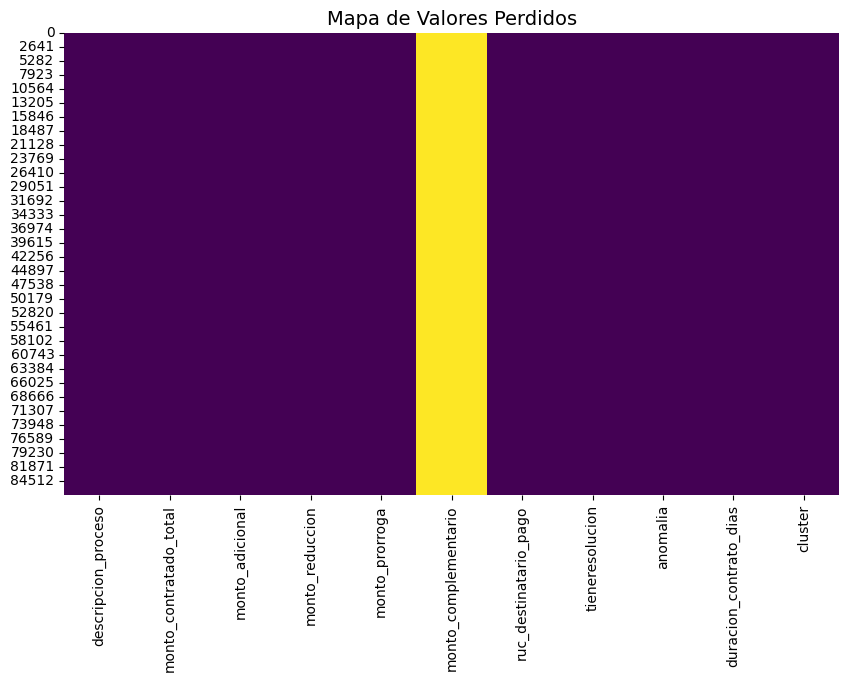

In [ ]:
#4. Visualización de valores perdidos
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Perdidos', fontsize=14)
plt.show()

In [ ]:
# Porcentaje de valores faltantes
missing_percent = data.isna().mean() * 100
missing_percent

,0
descripcion_proceso,0.0
monto_contratado_total,0.0
monto_adicional,0.0
monto_reduccion,0.0
monto_prorroga,0.0
monto_complementario,100.0
ruc_destinatario_pago,0.0
tieneresolucion,0.0
anomalia,0.0
duracion_contrato_dias,0.0


In [ ]:
############## Identificación de Valores Faltantes #########################################

# Crear un DataFrame con la información
missing_data = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Values': missing_values.values,
    'Missing_Percent': missing_percent.values
})

# Mostrar columnas con valores faltantes
missing_data = missing_data[missing_data['Missing_Values'] > 0]
print(missing_data)

                 Column  Missing_Values  Missing_Percent
5  monto_complementario           87147            100.0


In [ ]:
# O eliminar columnas con demasiados valores faltantes (por ejemplo, más del 15%)
data_clean = data.drop(columns=missing_data[missing_data['Missing_Percent'] > 15]['Column'])
data_clean

,descripcion_proceso,monto_contratado_total,monto_adicional,monto_reduccion,monto_prorroga,ruc_destinatario_pago,tieneresolucion,anomalia,duracion_contrato_dias,cluster
0,COMPRA CORPORATIVA PARA LA ADQUISICIÓN DE LÁMP...,8.242989e+04,0.0,0.0,0.0000,20600422481,0,1,719,2
1,ADQUISICIÓN DE PRODUCTOS FARMACEUTICOS - COMP...,9.356200e+03,0.0,0.0,0.0000,20503794692,0,1,468,1
2,ALQUILER DE LOCAL PARA LA OFICINA POSTAL DE ME...,6.190958e+05,0.0,0.0,15789.3533,20501577252,0,0,1095,3
3,ADQUISICIÓN DE MANGUERAS DE DRENAJE PARA TANQU...,1.030000e+05,0.0,0.0,0.0000,20600680201,0,0,13,3
4,SERVICIO DE TRANSPORTE TERRESTRE DE COMBUSTIBL...,7.152000e+05,0.0,0.0,0.0000,20390386924,0,0,365,3
...,...,...,...,...,...,...,...,...,...,...
87142,SERVICIO DE SEGURIDAD Y VIGILANCIA EN LAS INST...,1.248000e+05,0.0,0.0,0.0000,20600877004,0,0,365,3
87143,ADQUISICIÓN DE HENO DE ALFALFA PARA EL DEPARTA...,3.873500e+05,0.0,0.0,0.0000,20480421559,0,0,13,2
87144,CONTRATACION DEL SERVICIO DE ALIMENTACION Y NU...,2.966252e+05,0.0,0.0,0.0000,20341848955,0,0,6,1
87145,CONTRATACION DE LA EJECUCION DE OBRA CREACION ...,1.138733e+06,0.0,0.0,0.0000,20607969125,0,0,119,0


In [ ]:
for col in data_clean.columns:
    if set(data_clean[col].dropna().unique()).issubset({0, 1}):
        data_clean[col] = data_clean[col].astype('category')

# Verificamos tipos de datos
print(data_clean.dtypes)

descripcion_proceso         object
monto_contratado_total     float64
monto_adicional            float64
monto_reduccion            float64
monto_prorroga             float64
ruc_destinatario_pago        int64
tieneresolucion             object
anomalia                  category
duracion_contrato_dias       int64
cluster                      int64
dtype: object


In [ ]:
data_clean['ruc_destinatario_pago'] = data_clean['ruc_destinatario_pago'].astype(str)

In [ ]:
############# Identificar variables numéricas y categóricas ################################
numeric_cols = data_clean.select_dtypes(include='number').columns.tolist()
categorical_cols = data_clean.select_dtypes(include=['object','category']).columns.tolist()
print('Numéricas:', numeric_cols)
print('Categóricas:', categorical_cols)

Numéricas: ['monto_contratado_total', 'monto_adicional', 'monto_reduccion', 'monto_prorroga', 'duracion_contrato_dias', 'cluster']
Categóricas: ['descripcion_proceso', 'ruc_destinatario_pago', 'tieneresolucion', 'anomalia']


## Proporción de la variable ANOMALÍA

In [ ]:
# Conteo absoluto
data_clean['anomalia'].value_counts()

# Conteo con porcentajes
data_clean['anomalia'].value_counts(normalize=True) * 100

# Si quieres verlo como tabla resumida
pd.DataFrame({
    'count': data_clean['anomalia'].value_counts(),
    'pct': (data_clean['anomalia'].value_counts(normalize=True) * 100).round(2)
})


,count,pct
anomalia,,
0,64778,74.33
1,22369,25.67


### convertir variables categoricas en dummies

In [ ]:
data_clean["tieneresolucion"] = data_clean["tieneresolucion"].replace("SI", 1).astype(int)

### ELIMINAR variables que no entran al modelo

In [ ]:
#no se considera la variables
data_clean.drop(columns=['ruc_destinatario_pago'], inplace=True)

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87147 entries, 0 to 87146
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   descripcion_proceso     87147 non-null  object  
 1   monto_contratado_total  87147 non-null  float64 
 2   monto_adicional         87147 non-null  float64 
 3   monto_reduccion         87147 non-null  float64 
 4   monto_prorroga          87147 non-null  float64 
 5   tieneresolucion         87147 non-null  int64   
 6   anomalia                87147 non-null  category
 7   duracion_contrato_dias  87147 non-null  int64   
 8   cluster                 87147 non-null  int64   
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 5.4+ MB


## Usando modelo preentrenado para obtener vectores de los textos: Multiligual-MiniML-L12-v2

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_clean.drop(columns=["anomalia"]),
    data_clean["anomalia"],
    test_size=0.2,
    random_state=42,
    stratify=data_clean["anomalia"]
)


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2', device="cuda")

# Embeddings del train
X_train_des = X_train["descripcion_proceso"].astype(str).tolist()
emb_train = model.encode(X_train_des, show_progress_bar=True)
emb_train_df = pd.DataFrame(emb_train, columns=[f"emb_{i}" for i in range(emb_train.shape[1])])

# Embeddings del test
X_test_des = X_test["descripcion_proceso"].astype(str).tolist()
emb_test = model.encode(X_test_des, show_progress_bar=True)
emb_test_df = pd.DataFrame(emb_test, columns=[f"emb_{i}" for i in range(emb_test.shape[1])])


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2179 [00:00<?, ?it/s]

Batches:   0%|          | 0/545 [00:00<?, ?it/s]

In [ ]:
import pickle
with open("embeddings_variable_descripcion_train.pkl", "wb") as f:
    pickle.dump(emb_train_df, f)
with open("embeddings_variable_descripcion_test.pkl", "wb") as f:
    pickle.dump(emb_test_df, f)

### leer variable descripcion

In [ ]:
import pickle

In [ ]:
with open("/content/drive/MyDrive/MACHINE_LEARNING DATA/laboratorio model/machine/embeddings_variable_descripcion_train.pkl", "rb") as f:
            emb_train_df = pickle.load(f)

with open("/content/drive/MyDrive/MACHINE_LEARNING DATA/laboratorio model/machine/embeddings_variable_descripcion_test.pkl", "rb") as f:
            emb_test_df = pickle.load(f)

In [ ]:
emb_train_df = pd.DataFrame(emb_train_df, columns=[f"emb_{i}" for i in range(emb_train_df.shape[1])])
emb_test_df = pd.DataFrame(emb_test_df, columns=[f"emb_{i}" for i in range(emb_test_df.shape[1])])


### Concatenar los vectores con la dataset

In [ ]:
X_train_final = pd.concat([X_train.drop(columns=["descripcion_proceso"]).reset_index(drop=True),
                           emb_train_df], axis=1)

X_test_final = pd.concat([X_test.drop(columns=["descripcion_proceso"]).reset_index(drop=True),
                          emb_test_df], axis=1)


In [ ]:
X_train_final.head(3)

,monto_contratado_total,monto_adicional,monto_reduccion,monto_prorroga,tieneresolucion,duracion_contrato_dias,cluster,emb_0,emb_1,emb_2,...,emb_374,emb_375,emb_376,emb_377,emb_378,emb_379,emb_380,emb_381,emb_382,emb_383
0,307000.0,0.0,0.0,0.0,0,60,2,0.015138,0.231528,-0.024352,...,-0.410487,0.167597,0.178372,-0.153634,0.237244,0.479381,-0.257297,-0.424351,-0.128302,0.188774
1,330000.0,0.0,0.0,0.0,0,465,2,-0.014505,0.150853,0.110828,...,-0.066418,0.072711,-0.013095,-0.306971,0.199835,0.127506,-0.162307,0.083734,-0.039995,0.158578
2,36550.0,0.0,0.0,0.0,0,16,2,0.002615,0.048566,0.059843,...,-0.091441,-0.076985,0.192480,0.059238,-0.009145,0.007091,0.034758,-0.065930,0.212616,0.042281


### Escalar datos de train y test

In [ ]:
# ============ 4. Escalar (solo con train) ============
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)



### Balanceo del target - Undersampler

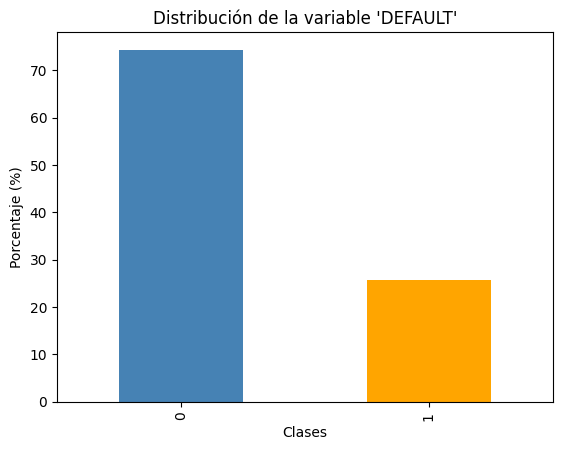

In [ ]:
# Gráfico de barras
tabla["porcentaje"].plot(kind="bar", color=["steelblue", "orange"])
plt.title("Distribución de la variable 'DEFAULT'")
plt.xlabel("Clases")
plt.ylabel("Porcentaje (%)")
plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler #USANDO UNDERSAMPLING

undersampler = RandomUnderSampler(random_state=123)

X_train_under, y_train_under = undersampler.fit_resample(X_train_scaled, y_train)


# ENTRENAMIENTO CON MODELOS DE ML

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_under, y_train_under)

y_pred = clf.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred)

0.7725186460126219

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84     12956
           1       0.55      0.65      0.59      4474

    accuracy                           0.77     17430
   macro avg       0.71      0.73      0.72     17430
weighted avg       0.79      0.77      0.78     17430



#### Regresion Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500, class_weight='balanced')
log_reg.fit(X_train_under, y_train_under)

LogisticRegression(class_weight='balanced', max_iter=500)

In [ ]:
pred = log_reg.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy_score(y_test, pred)

0.727653471026965

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81     12956
           1       0.48      0.64      0.55      4474

    accuracy                           0.73     17430
   macro avg       0.67      0.70      0.68     17430
weighted avg       0.76      0.73      0.74     17430



In [ ]:
numeric_cols = data_clean.drop(columns=["anomalia"]).select_dtypes(include=['int64', 'float64'])
corr = numeric_cols.corrwith(data_clean["anomalia"]).abs().sort_values(ascending=False)
print(corr)


duracion_contrato_dias    0.246499
monto_contratado_total    0.073965
monto_reduccion           0.046108
monto_adicional           0.038561
cluster                   0.023869
monto_prorroga            0.004326
tieneresolucion           0.002551
dtype: float64


## CLASIFICACION con modelos tuneados

# MODELOS DE ML

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


In [ ]:
models_param_grid = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 2, 3],

            'min_samples_leaf': [1, 2]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=100, random_state=42),
        'params': {
            'C': [0.01, 0.1, 1],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5],
            'weights': ['uniform']
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': [50],
            'learning_rate': [0.01]
        }
    }
}


In [ ]:
import pickle

results = []

for name, mp in models_param_grid.items():
    print(f"🔍 Entrenando y buscando mejores hiperparámetros para: {name} ...")

    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    grid.fit(X_train_under, y_train_under)

    #  GUARDAR EL MEJOR MODELO
    with open(f"best_model_{name.replace(' ', '_')}.pkl", "wb") as f:
        pickle.dump(grid.best_estimator_, f)

    y_pred = grid.predict(X_test_scaled)

    results.append({
        'Model': name,
        'Best_Params': grid.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted')
    })

# Crear tabla comparativa
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n RESULTADOS FINALES:")
print(results_df)


🔍 Entrenando y buscando mejores hiperparámetros para: Decision Tree ...
🔍 Entrenando y buscando mejores hiperparámetros para: Logistic Regression ...
🔍 Entrenando y buscando mejores hiperparámetros para: K-Nearest Neighbors ...
🔍 Entrenando y buscando mejores hiperparámetros para: AdaBoost ...

📊 RESULTADOS FINALES:
                 Model                                  Best_Params  Accuracy  \
0        Decision Tree      {'max_depth': 3, 'min_samples_leaf': 1}  0.737120   
3             AdaBoost  {'learning_rate': 0.01, 'n_estimators': 50}  0.732989   
1  Logistic Regression           {'C': 0.01, 'solver': 'liblinear'}  0.730178   
2  K-Nearest Neighbors     {'n_neighbors': 5, 'weights': 'uniform'}  0.709237   

   Precision    Recall        F1  
0   0.735019  0.737120  0.736040  
3   0.726512  0.732989  0.729467  
1   0.760735  0.730178  0.740795  
2   0.770358  0.709237  0.725557  


### GUARDANDO EL MEJOR MODELO

In [ ]:
import pickle

# 1) Encontrar el mejor modelo por F1
best_row = results_df.loc[results_df['F1'].idxmax()]
best_model_name = best_row['Model']

print("⭐ Mejor modelo según F1-score:", best_model_name)

# 2) Cargar el modelo ganador
file_path = f"best_model_{best_model_name.replace(' ', '_')}.pkl"

with open(file_path, "rb") as f:
    best_model = pickle.load(f)

# 3) Guardar como modelo final del proyecto
with open("modelo_anomalia_regresion.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("📦 Modelo final guardado como modelo_anomalia.pkl")


⭐ Mejor modelo según F1-score: Logistic Regression
📦 Modelo final guardado como modelo_anomalia.pkl


## MODELOS DE DEEP LEARNING

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.datasets import load_digits

from keras.layers import Dense, Input
from keras.models import Sequential

In [ ]:
import numpy as np
import pandas as pd
import pickle

# ==============================
# SKLEARN
# ==============================
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# ==============================
# KERAS
# ==============================
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


# ============================================================
# 1) PERCEPTRÓN (simple y rápido)
# ============================================================
perceptron = Perceptron(max_iter=15, tol=1e-3)
perceptron.fit(X_train_scaled, y_train)
f1_perc = f1_score(y_test, perceptron.predict(X_test_scaled), average="weighted")


# ============================================================
# 2) MLPClassifier (simple)
# ============================================================
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42
)

mlp.fit(X_train_under, y_train_under)
f1_mlp = f1_score(y_test, mlp.predict(X_test_scaled), average="weighted")


# ============================================================
# 3) MODELO KERAS SUPER SIMPLE
# ============================================================
tf.random.set_seed(42)

modelTF = Sequential()
modelTF.add(Dense(128, activation='relu', input_shape=(X_train_under.shape[1],)))
modelTF.add(Dense(64, activation='relu'))
modelTF.add(Dense(32, activation='relu'))
modelTF.add(Dense(2, activation='softmax'))

modelTF.compile(
    optimizer=Adam(0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento simple sin callbacks
modelTF.fit(
    X_train_under, y_train_under,
    epochs=20,
    batch_size=64,
    verbose=0
)

y_pred_tf = np.argmax(modelTF.predict(X_test_scaled), axis=1)
f1_tf = f1_score(y_test, y_pred_tf, average="weighted")


# ============================================================
# 4) COMPARAR
# ============================================================
scores = {
    "Perceptron": f1_perc,
    "MLP": f1_mlp,
    "Keras": f1_tf
}

mejor = max(scores, key=scores.get)

print("\n======================")
print(" Mejor modelo:", mejor)
print("F1-Score:", scores[mejor])
print("======================\n")


# ============================================================
# 5) GUARDAR MODELO SIMPLE EN PKL
# ============================================================
if mejor == "Perceptron":
    best_model = perceptron

elif mejor == "MLP":
    best_model = mlp

else:
    class KerasWrapper:
        def __init__(self, model):
            self.model = model
        def predict(self, X):
            return np.argmax(self.model.predict(X), axis=1)

    best_model = KerasWrapper(modelTF)

with open("modelo_anomalia.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Listo: modelo guardado como modelo_anomalia.pkl")
